In [5]:
 !pip install numpy pandas datetime pearsonr seaborn matplotlib scikit-learn plotly colorama
!pip install notebook ipywidgets



  Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)


In [6]:
!pip uninstall plotly -y
!pip uninstall matplotlib-plotly -y


Found existing installation: plotly 5.22.0
Uninstalling plotly-5.22.0:
  Successfully uninstalled plotly-5.22.0


In [7]:
pip install plotly


  Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

# STRUCTURING THE CSV's

In [3]:
SBIN=pd.read_csv('../data/historical_stock_data_SBIN.csv')
SBIN

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.00,543.20,18990090,1.589888e+10,305592,SBIN
1,2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.00,543.20,13985352,1.184411e+10,214049,SBIN
2,2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.00,543.20,32925140,2.800865e+10,394742,SBIN
3,2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.00,543.20,14929083,1.264751e+10,241973,SBIN
4,2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.00,543.20,12903496,1.086344e+10,206549,SBIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2021-01-07,EQ,289.00,291.80,287.00,285.05,288.00,287.70,289.15,337.95,149.45,30546600,8.832502e+09,183684,SBIN
856,2021-01-06,EQ,283.00,289.15,281.40,281.75,283.90,285.05,285.76,337.95,149.45,40765708,1.164907e+10,224327,SBIN
857,2021-01-05,EQ,278.05,282.45,277.00,281.05,281.40,281.75,279.69,337.95,149.45,27393072,7.661574e+09,155149,SBIN
858,2021-01-04,EQ,281.85,283.90,277.75,279.40,281.10,281.05,281.41,337.95,149.45,31450608,8.850464e+09,171760,SBIN


In [4]:
AXIS=pd.read_csv('../data/historical_stock_data_AXISBANK.csv')
AXIS


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.10,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
1,2024-06-20,EQ,1230.10,1241.50,1220.40,1226.65,1238.00,1239.50,1234.40,1243.35,927.15,8206858,1.013058e+10,184564,AXISBANK
2,2024-06-19,EQ,1193.00,1243.35,1185.50,1191.90,1229.00,1226.65,1216.95,1243.35,927.15,17987437,2.188987e+10,338098,AXISBANK
3,2024-06-18,EQ,1194.00,1194.00,1181.15,1181.05,1190.00,1191.90,1188.94,1242.20,927.15,6837181,8.128978e+09,166191,AXISBANK
4,2024-06-14,EQ,1180.95,1184.65,1170.00,1174.65,1181.00,1181.05,1178.90,1242.20,927.15,4451031,5.247312e+09,175362,AXISBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2021-01-07,EQ,659.00,676.50,659.00,654.25,670.10,671.10,668.78,760.70,286.00,17887570,1.196294e+10,203566,AXISBANK
856,2021-01-06,EQ,662.00,667.15,649.15,664.45,651.55,654.25,659.35,760.70,286.00,20829645,1.373394e+10,232735,AXISBANK
857,2021-01-05,EQ,618.00,667.90,618.00,624.70,664.15,664.45,649.82,760.70,286.00,37973963,2.467637e+10,393175,AXISBANK
858,2021-01-04,EQ,627.80,633.00,621.30,623.80,625.75,624.70,626.37,760.70,286.00,14068156,8.811802e+09,140952,AXISBANK


In [5]:
HDFC=pd.read_csv('../data/historical_stock_data_HDFCBANK.csv')
HDFC

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.5,1363.55,25815388,4.281944e+10,408577,HDFCBANK
1,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.5,1363.55,20704371,3.453260e+10,465827,HDFCBANK
2,2024-06-19,EQ,1613.40,1669.90,1604.00,1607.80,1657.00,1657.85,1644.44,1757.5,1363.55,45065598,7.410759e+10,709705,HDFCBANK
3,2024-06-18,EQ,1596.90,1610.50,1589.45,1596.90,1608.00,1607.80,1604.04,1757.5,1363.55,16207857,2.599807e+10,353540,HDFCBANK
4,2024-06-14,EQ,1584.00,1599.00,1577.70,1580.75,1595.60,1596.90,1592.12,1757.5,1363.55,12770277,2.033187e+10,320179,HDFCBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2021-01-07,EQ,1432.50,1432.60,1412.55,1420.55,1416.90,1416.25,1422.34,1464.4,738.75,9947421,1.414862e+10,127305,HDFCBANK
856,2021-01-06,EQ,1435.00,1440.00,1413.10,1426.70,1419.80,1420.55,1423.55,1464.4,738.75,11067025,1.575451e+10,151854,HDFCBANK
857,2021-01-05,EQ,1419.20,1430.75,1409.00,1416.00,1425.85,1426.70,1419.93,1464.4,738.75,7193412,1.021416e+10,186611,HDFCBANK
858,2021-01-04,EQ,1438.00,1438.00,1399.00,1425.05,1422.25,1416.00,1417.20,1464.4,738.75,7870096,1.115347e+10,177576,HDFCBANK


# Table Concatination

In [6]:
concatenated_df = pd.concat([HDFC, AXIS, SBIN], axis=0)

concatenated_df.reset_index(inplace=True)

concatenated_df


,index,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,0,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.50,1363.55,25815388,4.281944e+10,408577,HDFCBANK
1,1,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.50,1363.55,20704371,3.453260e+10,465827,HDFCBANK
2,2,2024-06-19,EQ,1613.40,1669.90,1604.00,1607.80,1657.00,1657.85,1644.44,1757.50,1363.55,45065598,7.410759e+10,709705,HDFCBANK
3,3,2024-06-18,EQ,1596.90,1610.50,1589.45,1596.90,1608.00,1607.80,1604.04,1757.50,1363.55,16207857,2.599807e+10,353540,HDFCBANK
4,4,2024-06-14,EQ,1584.00,1599.00,1577.70,1580.75,1595.60,1596.90,1592.12,1757.50,1363.55,12770277,2.033187e+10,320179,HDFCBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,855,2021-01-07,EQ,289.00,291.80,287.00,285.05,288.00,287.70,289.15,337.95,149.45,30546600,8.832502e+09,183684,SBIN
2576,856,2021-01-06,EQ,283.00,289.15,281.40,281.75,283.90,285.05,285.76,337.95,149.45,40765708,1.164907e+10,224327,SBIN
2577,857,2021-01-05,EQ,278.05,282.45,277.00,281.05,281.40,281.75,279.69,337.95,149.45,27393072,7.661574e+09,155149,SBIN
2578,858,2021-01-04,EQ,281.85,283.90,277.75,279.40,281.10,281.05,281.41,337.95,149.45,31450608,8.850464e+09,171760,SBIN


In [7]:
concatenated_df['DATE'] = pd.to_datetime(concatenated_df.DATE)
concatenated_df.head().style.set_properties(subset=['DATE','CLOSE'], **{'background-color': 'skyblue'})

,index,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,0,2024-06-21 00:00:00,EQ,1672.850000,1672.850000,1643.150000,1669.350000,1661.650000,1665.750000,1658.680000,1757.500000,1363.550000,25815388,42819437838.900002,408577,HDFCBANK
1,1,2024-06-20 00:00:00,EQ,1669.800000,1681.450000,1652.000000,1657.850000,1667.250000,1669.350000,1667.890000,1757.500000,1363.550000,20704371,34532604621.849998,465827,HDFCBANK
2,2,2024-06-19 00:00:00,EQ,1613.400000,1669.900000,1604.000000,1607.800000,1657.000000,1657.850000,1644.440000,1757.500000,1363.550000,45065598,74107587437.399994,709705,HDFCBANK
3,3,2024-06-18 00:00:00,EQ,1596.900000,1610.500000,1589.450000,1596.900000,1608.000000,1607.800000,1604.040000,1757.500000,1363.550000,16207857,25998073833.500000,353540,HDFCBANK
4,4,2024-06-14 00:00:00,EQ,1584.000000,1599.000000,1577.700000,1580.750000,1595.600000,1596.900000,1592.120000,1757.500000,1363.550000,12770277,20331873861.150002,320179,HDFCBANK


# First Five

In [8]:
AXIS.head()

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.1,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
1,2024-06-20,EQ,1230.10,1241.50,1220.40,1226.65,1238.0,1239.50,1234.40,1243.35,927.15,8206858,1.013058e+10,184564,AXISBANK
2,2024-06-19,EQ,1193.00,1243.35,1185.50,1191.90,1229.0,1226.65,1216.95,1243.35,927.15,17987437,2.188987e+10,338098,AXISBANK
3,2024-06-18,EQ,1194.00,1194.00,1181.15,1181.05,1190.0,1191.90,1188.94,1242.20,927.15,6837181,8.128978e+09,166191,AXISBANK
4,2024-06-14,EQ,1180.95,1184.65,1170.00,1174.65,1181.0,1181.05,1178.90,1242.20,927.15,4451031,5.247312e+09,175362,AXISBANK


In [9]:
HDFC.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.5,1363.55,25815388,4.281944e+10,408577,HDFCBANK
1,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.5,1363.55,20704371,3.453260e+10,465827,HDFCBANK
2,2024-06-19,EQ,1613.40,1669.90,1604.00,1607.80,1657.00,1657.85,1644.44,1757.5,1363.55,45065598,7.410759e+10,709705,HDFCBANK
3,2024-06-18,EQ,1596.90,1610.50,1589.45,1596.90,1608.00,1607.80,1604.04,1757.5,1363.55,16207857,2.599807e+10,353540,HDFCBANK
4,2024-06-14,EQ,1584.00,1599.00,1577.70,1580.75,1595.60,1596.90,1592.12,1757.5,1363.55,12770277,2.033187e+10,320179,HDFCBANK


In [10]:
SBIN.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.0,543.2,18990090,1.589888e+10,305592,SBIN
1,2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.0,543.2,13985352,1.184411e+10,214049,SBIN
2,2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.0,543.2,32925140,2.800865e+10,394742,SBIN
3,2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.0,543.2,14929083,1.264751e+10,241973,SBIN
4,2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.0,543.2,12903496,1.086344e+10,206549,SBIN


In [11]:
SBIN.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.0,543.2,18990090,1.589888e+10,305592,SBIN
1,2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.0,543.2,13985352,1.184411e+10,214049,SBIN
2,2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.0,543.2,32925140,2.800865e+10,394742,SBIN
3,2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.0,543.2,14929083,1.264751e+10,241973,SBIN
4,2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.0,543.2,12903496,1.086344e+10,206549,SBIN


In [12]:
SBIN.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.0,543.2,18990090,1.589888e+10,305592,SBIN
1,2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.0,543.2,13985352,1.184411e+10,214049,SBIN
2,2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.0,543.2,32925140,2.800865e+10,394742,SBIN
3,2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.0,543.2,14929083,1.264751e+10,241973,SBIN
4,2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.0,543.2,12903496,1.086344e+10,206549,SBIN


# Shape

In [13]:
AXIS.shape


(860, 15)

In [14]:
HDFC.shape

(860, 15)

In [15]:
SBIN.shape

(860, 15)

# Descriptive Analysis

In [16]:
AXIS.describe()


,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,8.600000e+02,8.600000e+02,860.000000
mean,855.265000,864.633256,845.339302,854.424884,855.083314,855.142326,855.071453,935.925116,604.876105,1.075942e+07,9.088112e+09,192487.424419
std,150.923297,151.778313,150.241715,150.753484,151.118037,151.106442,150.837032,125.429105,165.907682,6.480249e+06,5.441883e+09,84268.820579
min,618.000000,625.450000,616.000000,620.450000,623.400000,623.800000,622.150000,760.700000,286.000000,1.697570e+05,1.936923e+08,5380.000000
25%,734.075000,744.000000,724.412500,733.237500,734.912500,733.662500,733.830000,866.900000,568.400000,6.824317e+06,5.746819e+09,140174.750000
50%,806.300000,815.975000,795.500000,803.975000,804.575000,804.450000,806.460000,866.900000,618.250000,9.088820e+06,7.809861e+09,175493.500000
75%,974.062500,983.362500,963.187500,973.312500,974.150000,973.675000,973.067500,990.000000,707.700000,1.268940e+07,1.076231e+10,221273.500000
max,1246.000000,1246.000000,1223.750000,1239.500000,1238.000000,1239.500000,1234.400000,1246.000000,927.150000,6.430398e+07,5.154228e+10,932878.000000


In [17]:
HDFC.describe()


,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,8.600000e+02,8.600000e+02,8.600000e+02
mean,1523.804244,1537.360291,1510.268547,1523.629186,1524.169709,1523.895988,1523.977512,1711.140814,1225.636570,1.207803e+07,1.851888e+10,2.618411e+05
std,96.524839,95.707632,96.237667,95.582654,95.457668,95.658811,95.697454,54.133915,199.236056,9.666811e+06,1.508101e+10,1.595177e+05
min,1275.000000,1296.400000,1271.600000,1281.300000,1279.450000,1281.300000,1282.590000,1464.400000,738.750000,5.285570e+05,7.746360e+08,1.599500e+04
25%,1453.287500,1466.887500,1440.562500,1454.375000,1456.300000,1454.587500,1454.527500,1722.100000,1271.600000,6.009498e+06,8.903962e+09,1.650095e+05
50%,1518.500000,1529.900000,1505.000000,1518.000000,1517.475000,1518.200000,1519.255000,1725.000000,1271.600000,9.098806e+06,1.388136e+10,2.202855e+05
75%,1604.362500,1614.650000,1590.100000,1604.037500,1605.100000,1604.212500,1602.295000,1757.500000,1363.550000,1.554611e+07,2.392686e+10,3.172780e+05
max,1723.450000,1757.500000,1713.800000,1728.200000,1729.000000,1728.200000,1733.310000,1757.500000,1460.250000,8.670560e+07,1.439861e+11,2.098772e+06


In [18]:
AXIS.describe()


,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,8.600000e+02,8.600000e+02,860.000000
mean,855.265000,864.633256,845.339302,854.424884,855.083314,855.142326,855.071453,935.925116,604.876105,1.075942e+07,9.088112e+09,192487.424419
std,150.923297,151.778313,150.241715,150.753484,151.118037,151.106442,150.837032,125.429105,165.907682,6.480249e+06,5.441883e+09,84268.820579
min,618.000000,625.450000,616.000000,620.450000,623.400000,623.800000,622.150000,760.700000,286.000000,1.697570e+05,1.936923e+08,5380.000000
25%,734.075000,744.000000,724.412500,733.237500,734.912500,733.662500,733.830000,866.900000,568.400000,6.824317e+06,5.746819e+09,140174.750000
50%,806.300000,815.975000,795.500000,803.975000,804.575000,804.450000,806.460000,866.900000,618.250000,9.088820e+06,7.809861e+09,175493.500000
75%,974.062500,983.362500,963.187500,973.312500,974.150000,973.675000,973.067500,990.000000,707.700000,1.268940e+07,1.076231e+10,221273.500000
max,1246.000000,1246.000000,1223.750000,1239.500000,1238.000000,1239.500000,1234.400000,1246.000000,927.150000,6.430398e+07,5.154228e+10,932878.000000


# Quick Summery

In [19]:
AXIS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          860 non-null    object 
 1   SERIES        860 non-null    object 
 2   OPEN          860 non-null    float64
 3   HIGH          860 non-null    float64
 4   LOW           860 non-null    float64
 5   PREV. CLOSE   860 non-null    float64
 6   LTP           860 non-null    float64
 7   CLOSE         860 non-null    float64
 8   VWAP          860 non-null    float64
 9   52W H         860 non-null    float64
 10  52W L         860 non-null    float64
 11  VOLUME        860 non-null    int64  
 12  VALUE         860 non-null    float64
 13  NO OF TRADES  860 non-null    int64  
 14  SYMBOL        860 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 100.9+ KB


In [20]:
HDFC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          860 non-null    object 
 1   SERIES        860 non-null    object 
 2   OPEN          860 non-null    float64
 3   HIGH          860 non-null    float64
 4   LOW           860 non-null    float64
 5   PREV. CLOSE   860 non-null    float64
 6   LTP           860 non-null    float64
 7   CLOSE         860 non-null    float64
 8   VWAP          860 non-null    float64
 9   52W H         860 non-null    float64
 10  52W L         860 non-null    float64
 11  VOLUME        860 non-null    int64  
 12  VALUE         860 non-null    float64
 13  NO OF TRADES  860 non-null    int64  
 14  SYMBOL        860 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 100.9+ KB


In [21]:
SBIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          860 non-null    object 
 1   SERIES        860 non-null    object 
 2   OPEN          860 non-null    float64
 3   HIGH          860 non-null    float64
 4   LOW           860 non-null    float64
 5   PREV. CLOSE   860 non-null    float64
 6   LTP           860 non-null    float64
 7   CLOSE         860 non-null    float64
 8   VWAP          860 non-null    float64
 9   52W H         860 non-null    float64
 10  52W L         860 non-null    float64
 11  VOLUME        860 non-null    int64  
 12  VALUE         860 non-null    float64
 13  NO OF TRADES  860 non-null    int64  
 14  SYMBOL        860 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 100.9+ KB


# Historical Closing Price visualisation


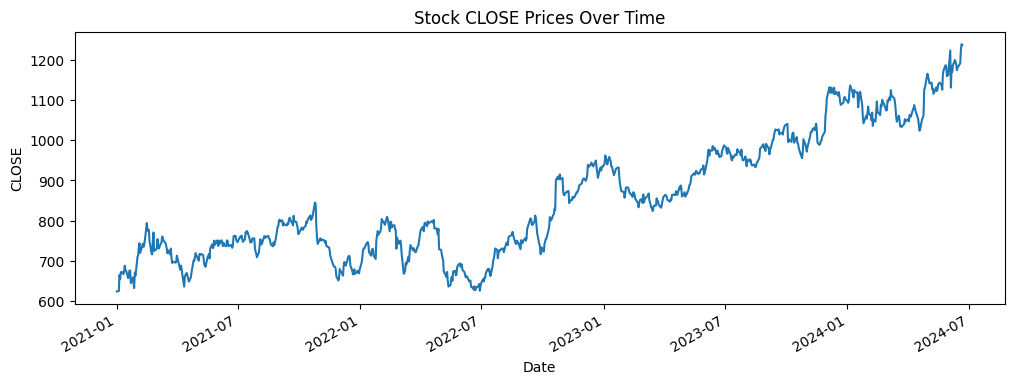

In [22]:
AXIS['DATE'] = pd.to_datetime(AXIS['DATE'])
AXIS.set_index('DATE', inplace=True)
ax = AXIS["CLOSE"].plot(figsize=(12, 4))
ax.set_xlabel("Date")
ax.set_ylabel("CLOSE")
ax.set_title("Stock CLOSE Prices Over Time")


plt.show()

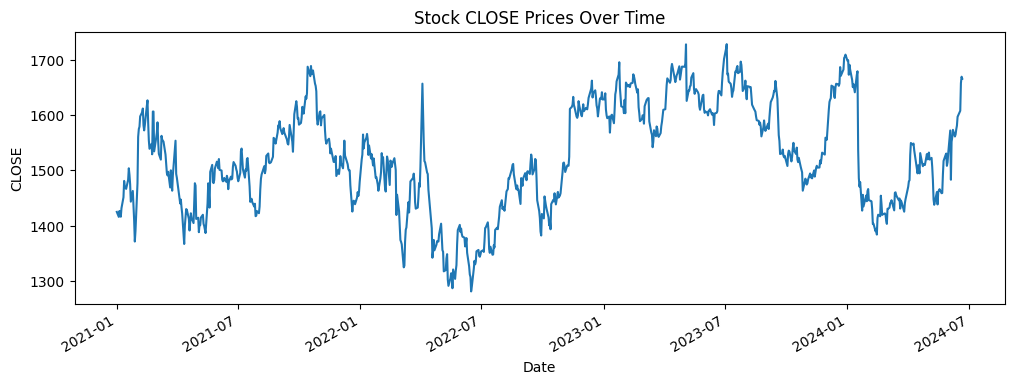

In [23]:
HDFC['DATE'] = pd.to_datetime(HDFC['DATE'])
HDFC.set_index('DATE', inplace=True)

ax = HDFC["CLOSE"].plot(figsize=(12, 4))
ax.set_xlabel("Date")
ax.set_ylabel("CLOSE")
ax.set_title("Stock CLOSE Prices Over Time")


plt.show()

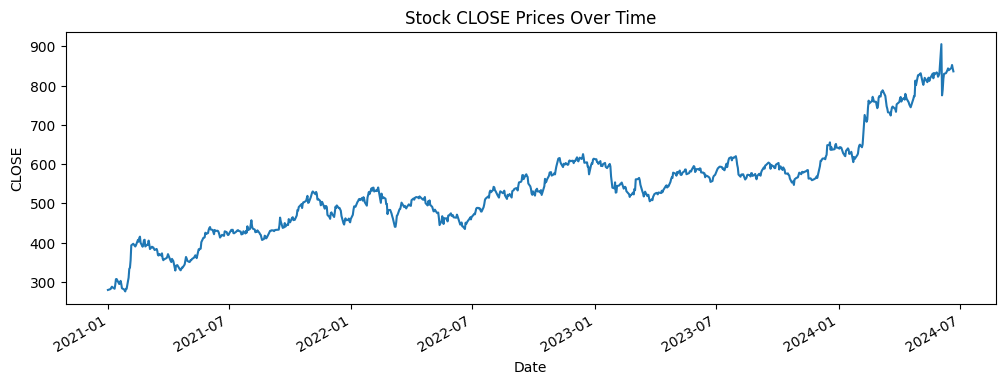

In [24]:
SBIN['DATE'] = pd.to_datetime(SBIN['DATE'])
SBIN.set_index('DATE', inplace=True)

ax = SBIN["CLOSE"].plot(figsize=(12, 4))
ax.set_xlabel("Date")
ax.set_ylabel("CLOSE")
ax.set_title("Stock CLOSE Prices Over Time")


plt.show()

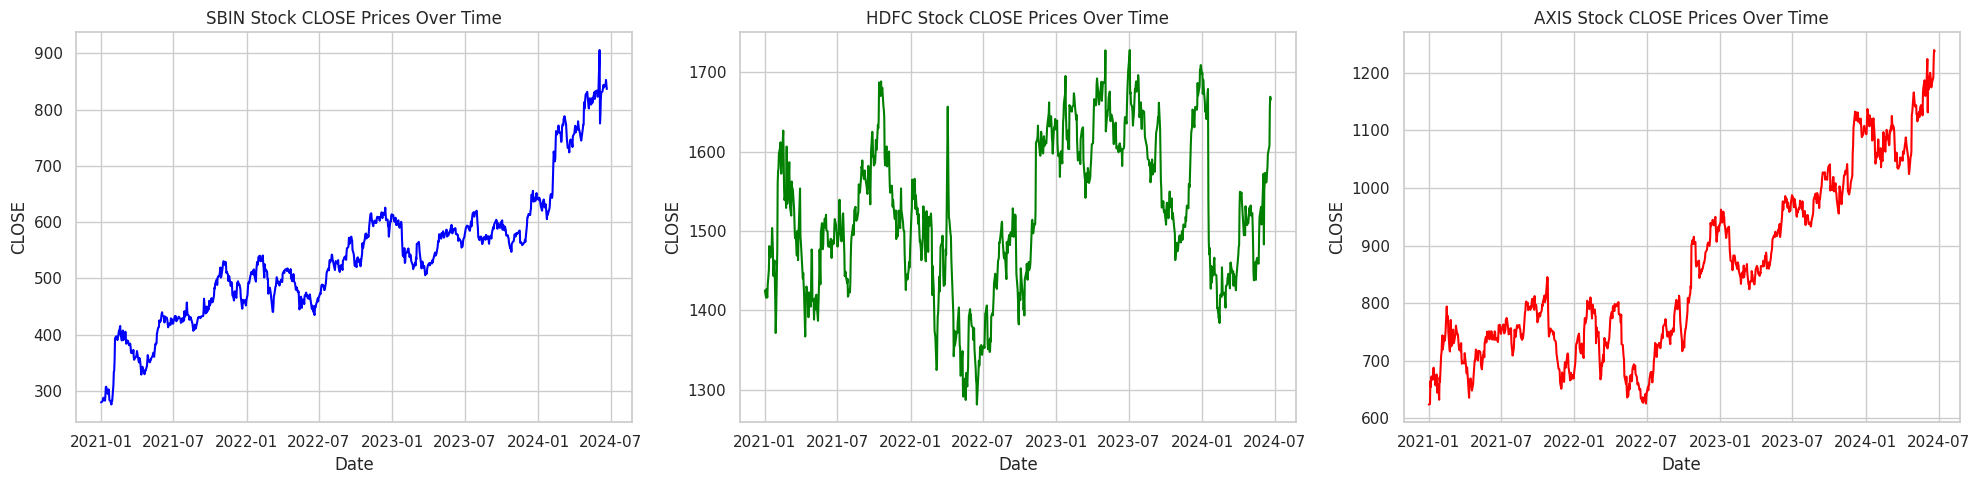

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Plot SBIN with a specific color
axs[0].plot(SBIN["CLOSE"], color='blue')
axs[0].set_xlabel("Date")
axs[0].set_ylabel("CLOSE")
axs[0].set_title("SBIN Stock CLOSE Prices Over Time")

# Plot HDFC with a specific color
axs[1].plot(HDFC["CLOSE"], color='green')
axs[1].set_xlabel("Date")
axs[1].set_ylabel("CLOSE")
axs[1].set_title("HDFC Stock CLOSE Prices Over Time")

# Plot AXIS with a specific color
axs[2].plot(AXIS["CLOSE"], color='red')
axs[2].set_xlabel("Date")
axs[2].set_ylabel("CLOSE")
axs[2].set_title("AXIS Stock CLOSE Prices Over Time")

# Adjust layout
plt.tight_layout()
plt.show()


# The total volume of stocks being traded from 2021 to 2024

<Axes: xlabel='DATE'>

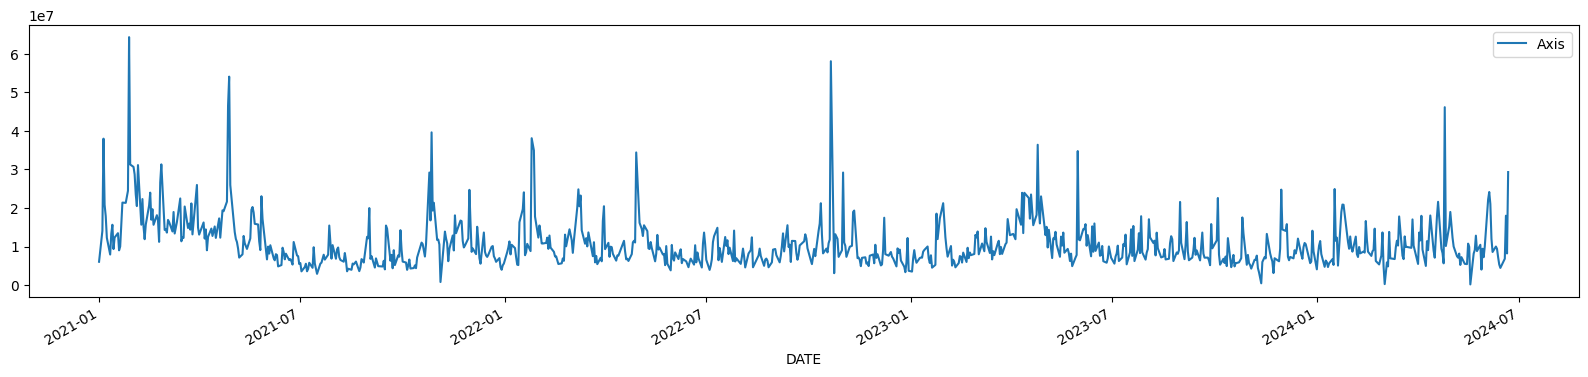

In [26]:
AXIS['VOLUME'].plot(legend = True, figsize = (20,4), label="Axis")


<Axes: xlabel='DATE'>

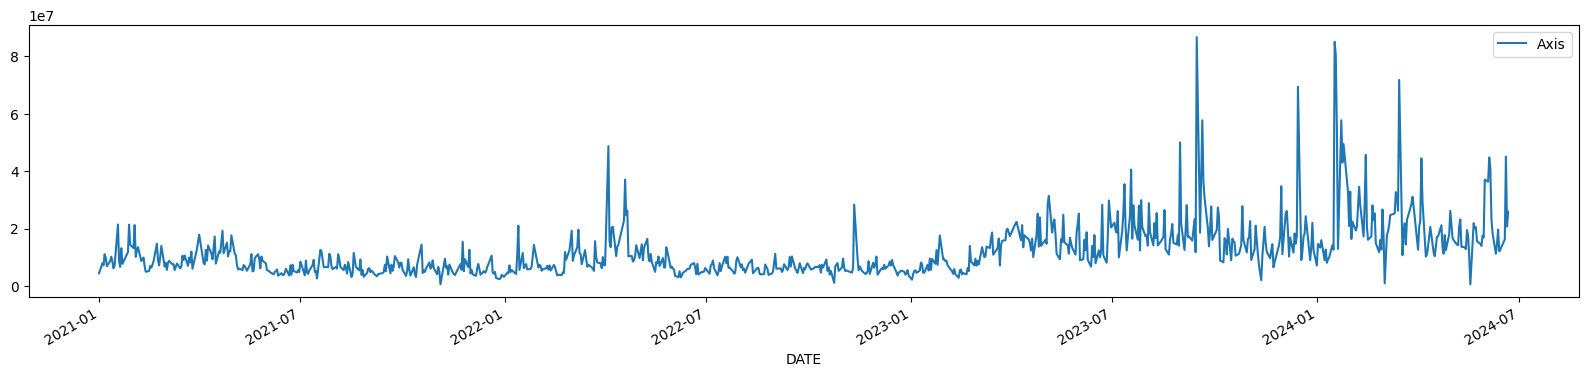

In [27]:
HDFC['VOLUME'].plot(legend = True, figsize = (20,4), label="Axis")


<Axes: xlabel='DATE'>

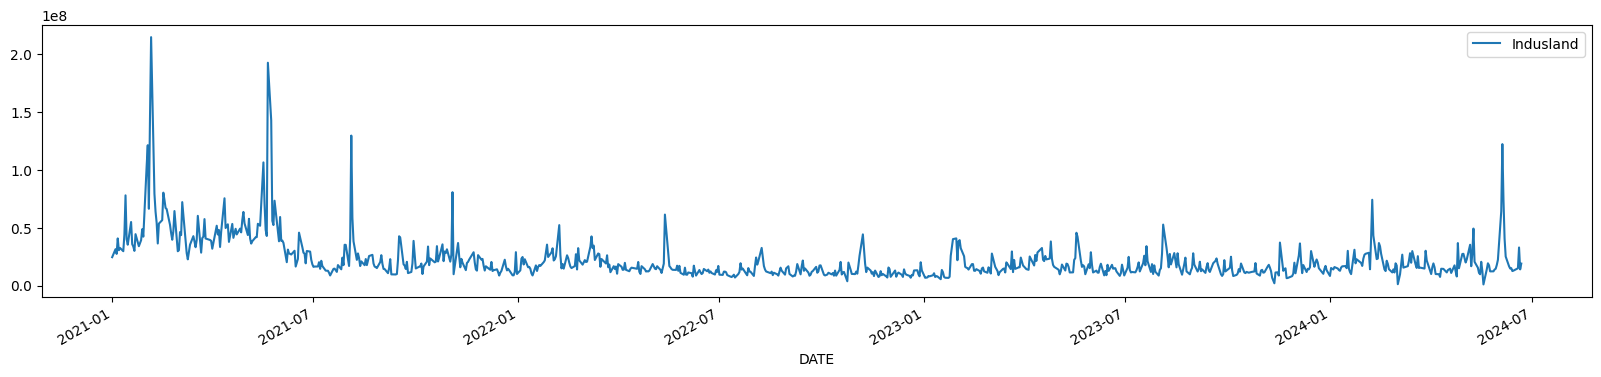

In [28]:
SBIN['VOLUME'].plot(legend = True, figsize = (20,4), label="Indusland")



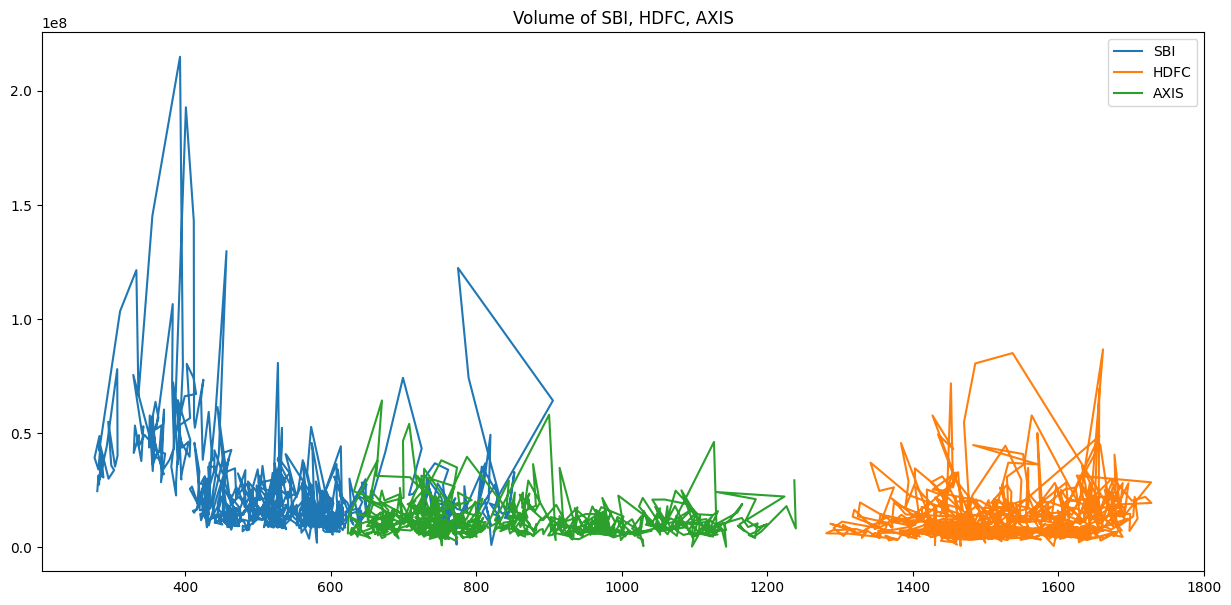

In [80]:
fig = plt.figure(figsize = (15,7))

plt.plot(SBIN['CLOSE'] , SBIN['VOLUME'])
plt.plot(HDFC['CLOSE'] , HDFC['VOLUME'])
plt.plot(AXIS['CLOSE'], AXIS['VOLUME'])

plt.title('Volume of SBI, HDFC, AXIS')
plt.legend(['SBI', 'HDFC', 'AXIS'])


plt.show()

# 1.2 Moving Averages

# 1.1.1  Calculating the Simple Moving Average of the stocks;
"""A SMA tells us the unweighted mean of the previous K data points,
The more the value of K the more smooth is the curve, but increasing K decreases accuracy.
If the data points are p1,  p2, . . . , pn then we calculate the simple moving average."""

# AXIS BANK

In [30]:
AXIS_SMA = AXIS['CLOSE'].to_frame()
AXIS_SMA['SMA30'] = AXIS['CLOSE'].rolling(30).mean()
AXIS_SMA.dropna(inplace=True)
AXIS_SMA

,CLOSE,SMA30
DATE,,
2024-05-10,1120.10,1170.721667
2024-05-09,1115.65,1166.661667
2024-05-08,1128.65,1162.966667
2024-05-07,1127.70,1159.668333
2024-05-06,1143.65,1158.060000
...,...,...
2021-01-07,671.10,703.988333
2021-01-06,654.25,699.896667
2021-01-05,664.45,696.120000


<Axes: xlabel='DATE'>

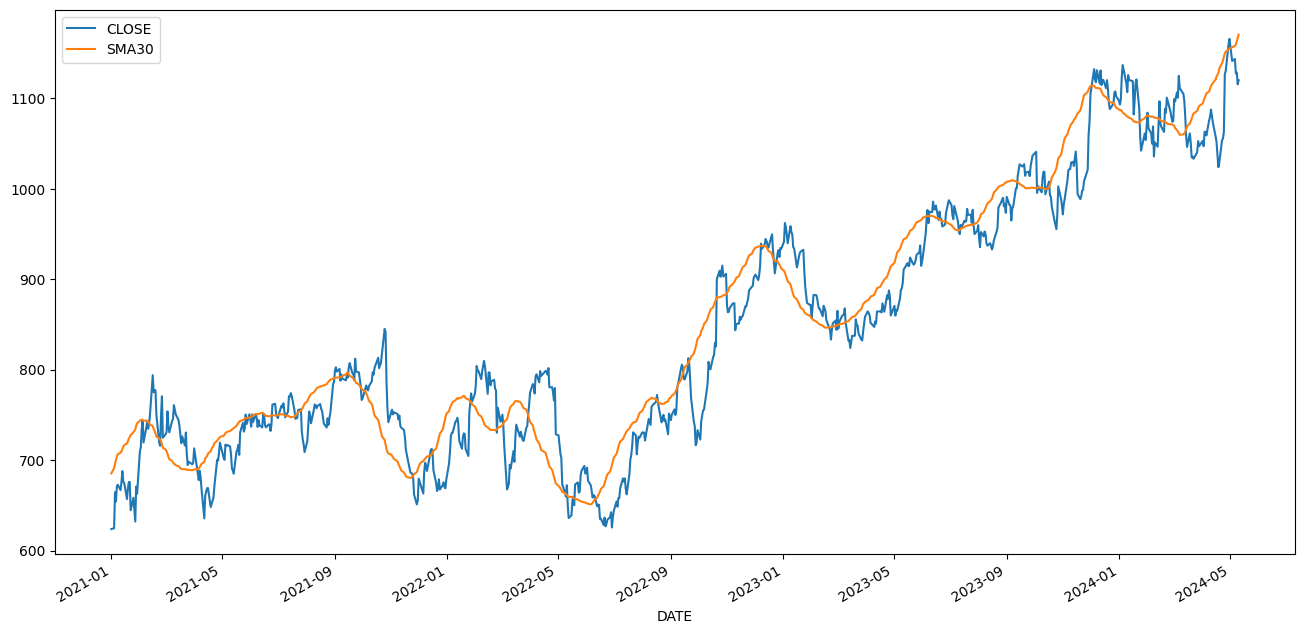

In [31]:
AXIS_SMA[['CLOSE','SMA30']].plot(label='Axis Bank',
                                figsize=(16,8))

# HDFC

In [32]:
HDFC_SMA = HDFC['CLOSE'].to_frame()
HDFC_SMA['SMA30'] = HDFC['CLOSE'].rolling(30).mean()
HDFC_SMA.dropna(inplace=True)
HDFC_SMA

,CLOSE,SMA30
DATE,,
2024-05-10,1437.90,1531.418333
2024-05-09,1447.50,1524.143333
2024-05-08,1482.65,1517.920000
2024-05-07,1506.15,1512.863333
2024-05-06,1522.65,1510.025000
...,...,...
2021-01-07,1416.25,1511.470000
2021-01-06,1420.55,1507.011667
2021-01-05,1426.70,1501.685000


<Axes: xlabel='DATE'>

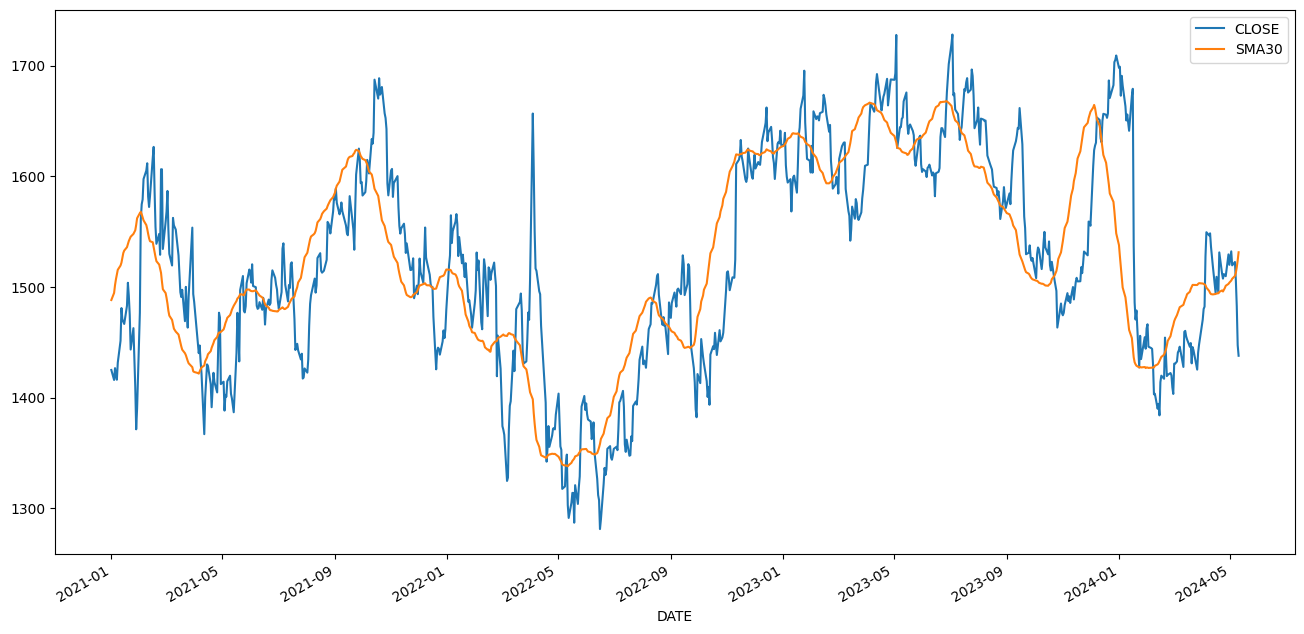

In [33]:
HDFC_SMA[['CLOSE','SMA30']].plot(label='HDFC Bank',
                                figsize=(16,8))

# SBIN

In [34]:
SBIN_SMA = SBIN['CLOSE'].to_frame()
SBIN_SMA['SMA30'] = SBIN['CLOSE'].rolling(30).mean()
SBIN_SMA.dropna(inplace=True)
SBIN_SMA

,CLOSE,SMA30
DATE,,
2024-05-10,817.35,828.461667
2024-05-09,819.80,827.911667
2024-05-08,810.80,826.813333
2024-05-07,801.90,825.123333
2024-05-06,807.80,823.886667
...,...,...
2021-01-07,287.70,333.113333
2021-01-06,285.05,328.775000
2021-01-05,281.75,324.441667


<Axes: xlabel='DATE'>

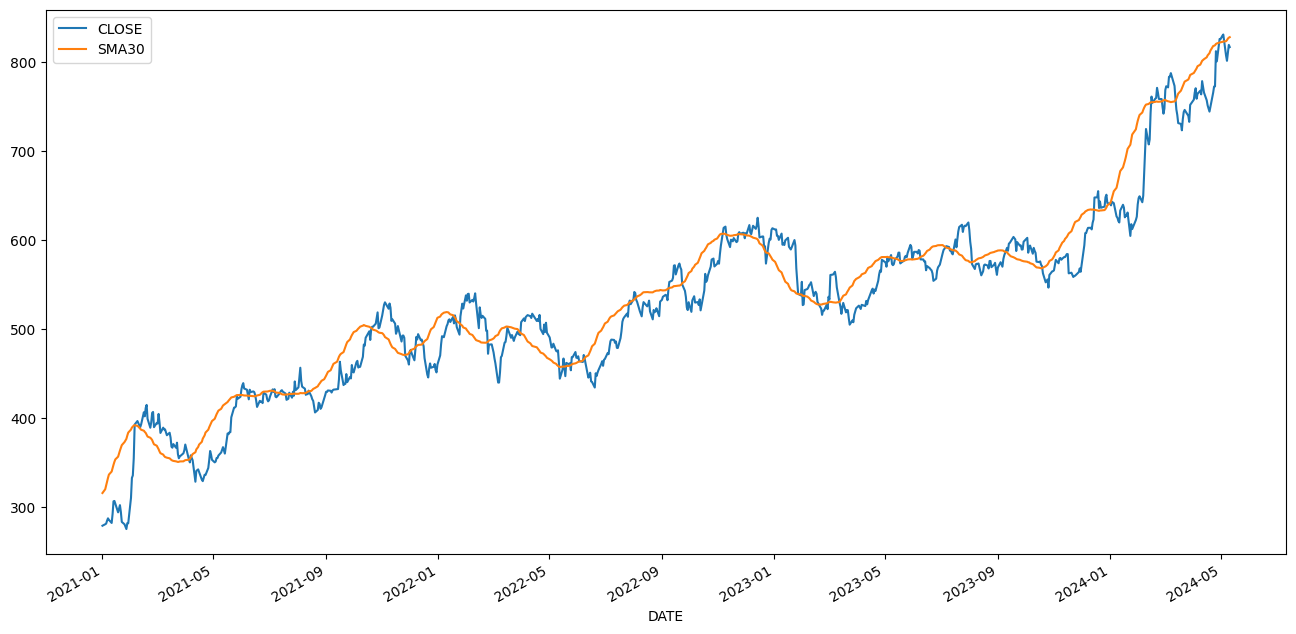

In [35]:
SBIN_SMA[['CLOSE','SMA30']].plot(label='SBIN Bank',
                                figsize=(16,8))

# 1.1.2  Calculating the Cumulative Moving Average of Axis Bank Stock;
***
CMA is the mean of all the previous values up to the current value.
CMA of dataPoints x1, x2 …..  at time t can be calculated as,
the summation of all x's divided by time t
***

# AXIS 

In [36]:
AXIS_CMA = AXIS['CLOSE'].to_frame()
AXIS_CMA['CMA30'] = AXIS['CLOSE'].expanding().mean()
AXIS_CMA

,CLOSE,CMA30
DATE,,
2024-06-21,1237.45,1237.450000
2024-06-20,1239.50,1238.475000
2024-06-19,1226.65,1234.533333
2024-06-18,1191.90,1223.875000
2024-06-14,1181.05,1215.310000
...,...,...
2021-01-07,671.10,856.139252
2021-01-06,654.25,855.903676
2021-01-05,664.45,855.680536


<Axes: xlabel='DATE'>

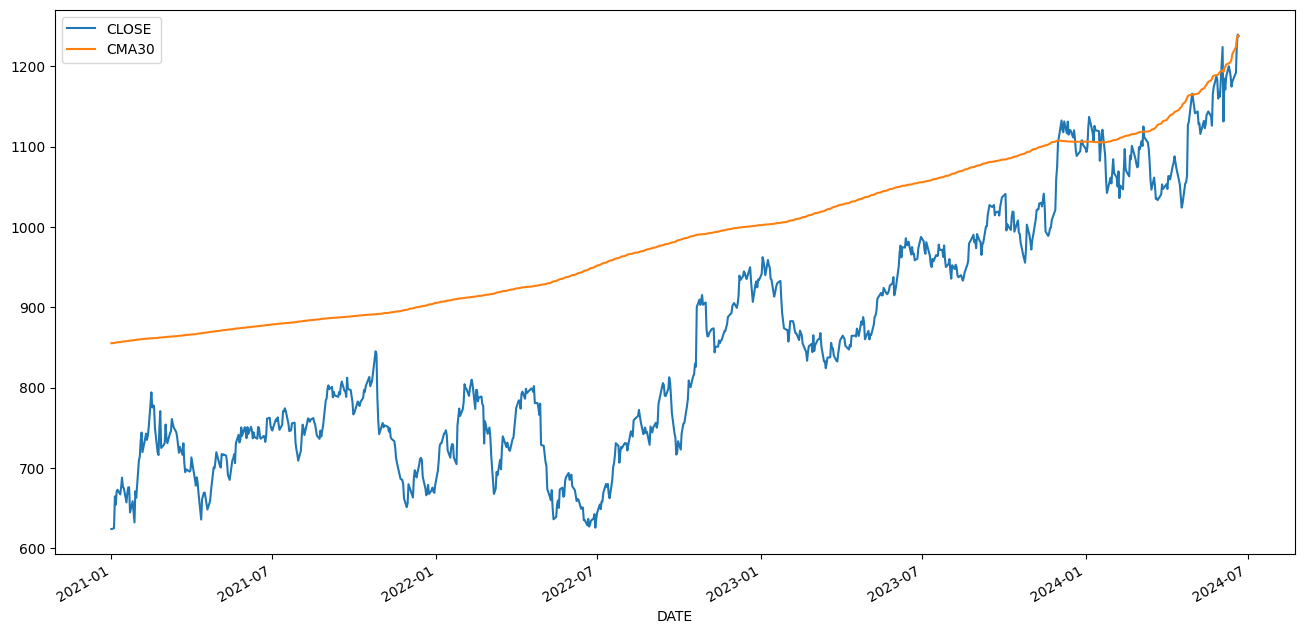

In [37]:
AXIS_CMA[['CLOSE','CMA30']].plot(label='Axis Bank',
                                 figsize=(16,8))

# HDFC

In [38]:
HDFC_CMA = HDFC['CLOSE'].to_frame()
HDFC_CMA['CMA30'] = HDFC['CLOSE'].expanding().mean()
HDFC_CMA

,CLOSE,CMA30
DATE,,
2024-06-21,1665.75,1665.750000
2024-06-20,1669.35,1667.550000
2024-06-19,1657.85,1664.316667
2024-06-18,1607.80,1650.187500
2024-06-14,1596.90,1639.530000
...,...,...
2021-01-07,1416.25,1524.371787
2021-01-06,1420.55,1524.250642
2021-01-05,1426.70,1524.136946


<Axes: xlabel='DATE'>

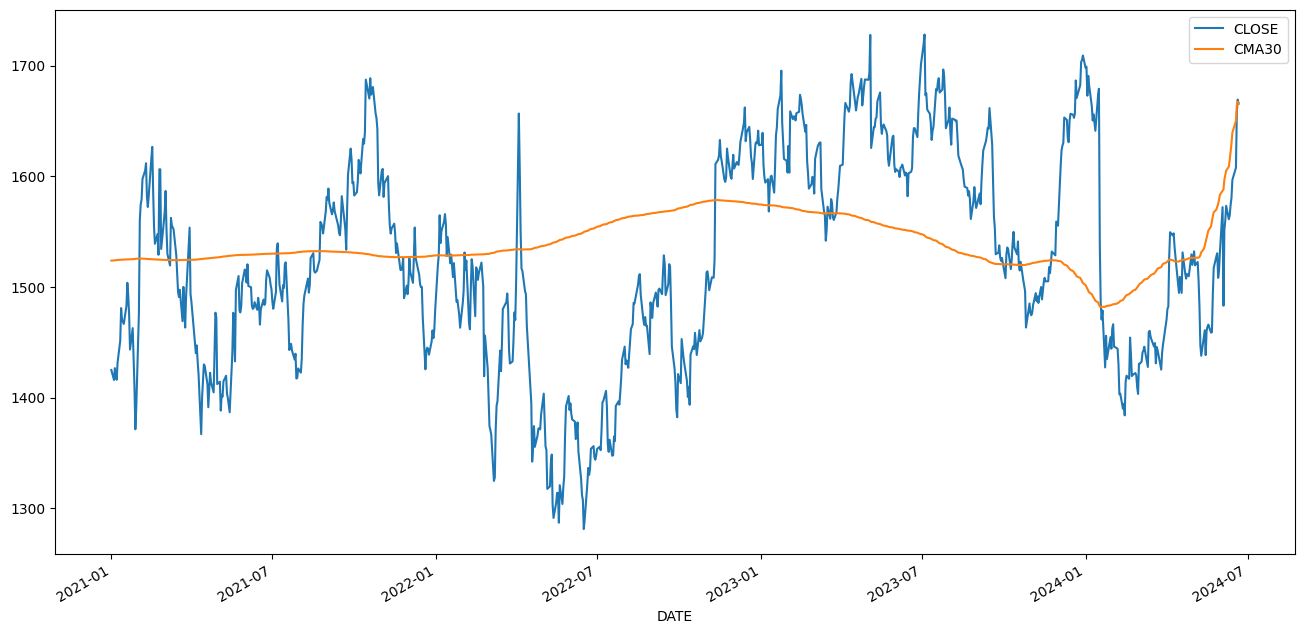

In [39]:
HDFC_CMA[['CLOSE','CMA30']].plot(label='HDFC Bank',
                                 figsize=(16,8))

# SBIN

In [40]:
SBIN_CMA = SBIN['CLOSE'].to_frame()
SBIN_CMA['CMA30'] = SBIN['CLOSE'].expanding().mean()
SBIN_CMA

,CLOSE,CMA30
DATE,,
2024-06-21,836.30,836.300000
2024-06-20,843.75,840.025000
2024-06-19,852.60,844.216667
2024-06-18,844.90,844.387500
2024-06-14,839.20,843.350000
...,...,...
2021-01-07,287.70,538.722488
2021-01-06,285.05,538.426488
2021-01-05,281.75,538.127331


<Axes: xlabel='DATE'>

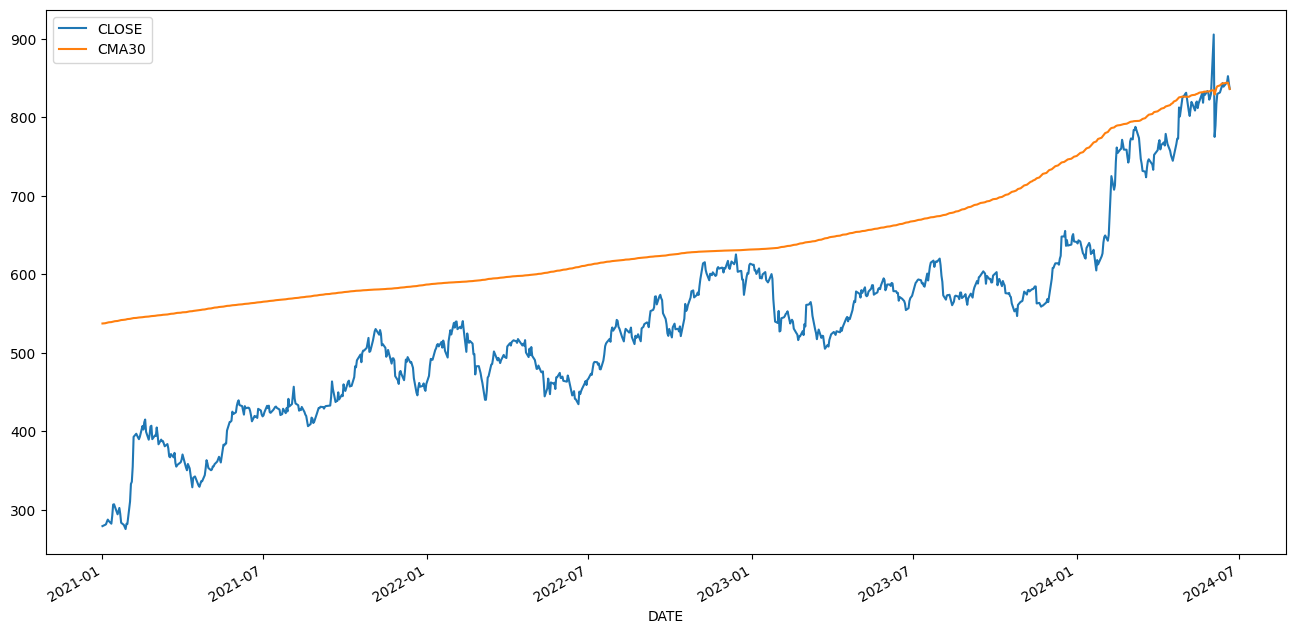

In [41]:
SBIN_CMA[['CLOSE','CMA30']].plot(label='SBI Bank',
                                 figsize=(16,8))

# 1.1.3  Calculating Exponential Moving Average of Axis Bank Stocks;
***
EMA tells us the weighted mean of the previous K data points.
EMA places a greater weight and significance on the most recent data points.
***

# AXIS

In [42]:
AXIS_EMA = AXIS['CLOSE'].to_frame()
AXIS_EMA['EWMA30'] = AXIS['CLOSE'].ewm(span=30).mean()
AXIS_EMA

,CLOSE,EWMA30
DATE,,
2024-06-21,1237.45,1237.450000
2024-06-20,1239.50,1238.509167
2024-06-19,1226.65,1234.289745
2024-06-18,1191.90,1222.609825
2024-06-14,1181.05,1213.153959
...,...,...
2021-01-07,671.10,691.769044
2021-01-06,654.25,689.348461
2021-01-05,664.45,687.742108


<Axes: xlabel='DATE'>

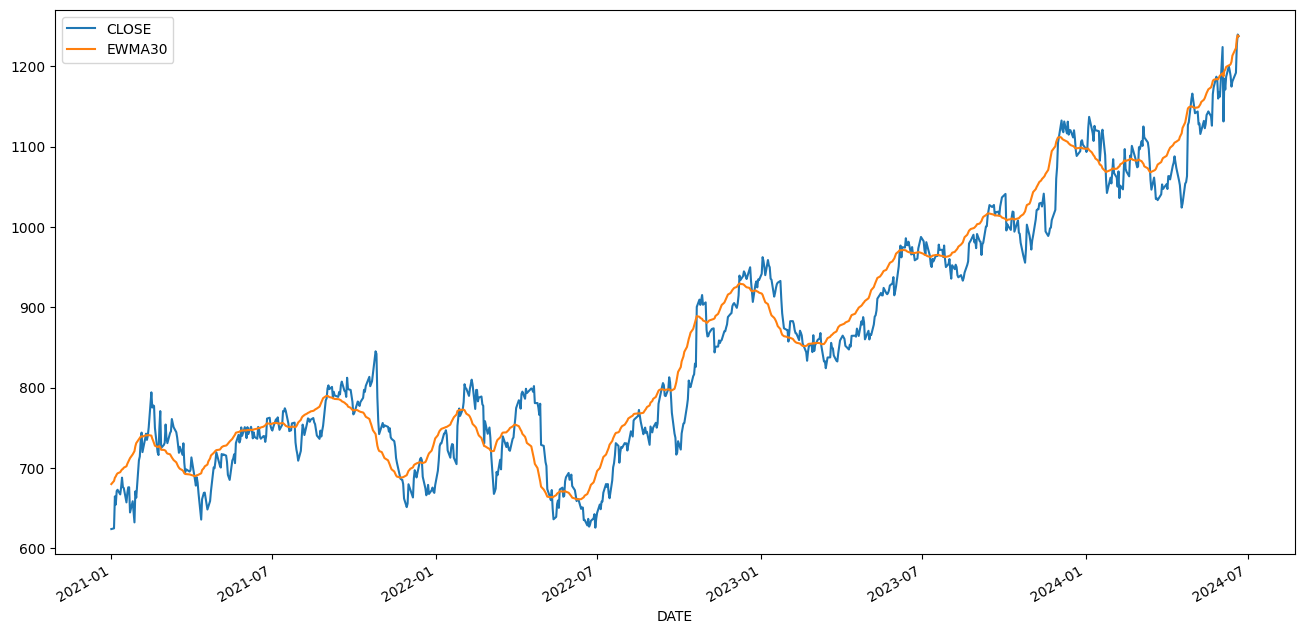

In [43]:
AXIS_EMA[['CLOSE','EWMA30']].plot(label='Axis Bank',
                                  figsize=(16,8))

# HDFC

In [44]:
HDFC_EMA = HDFC['CLOSE'].to_frame()
HDFC_EMA['EWMA30'] = HDFC['CLOSE'].ewm(span=30).mean()
HDFC_EMA

,CLOSE,EWMA30
DATE,,
2024-06-21,1665.75,1665.750000
2024-06-20,1669.35,1667.610000
2024-06-19,1657.85,1664.137449
2024-06-18,1607.80,1648.614429
2024-06-14,1596.90,1636.848144
...,...,...
2021-01-07,1416.25,1488.785478
2021-01-06,1420.55,1484.383189
2021-01-05,1426.70,1480.661693


<Axes: xlabel='DATE'>

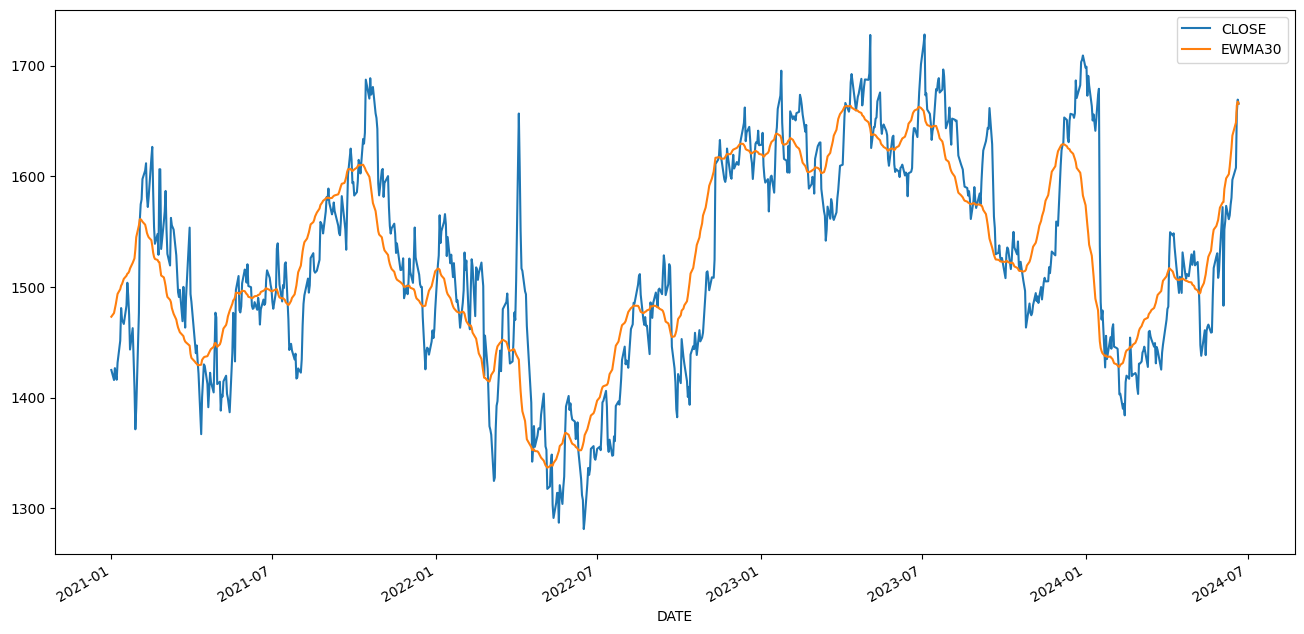

In [45]:
HDFC_EMA[['CLOSE','EWMA30']].plot(label='HDFC Bank',
                                  figsize=(16,8))

# SBIN


In [46]:
SBIN_EMA = SBIN['CLOSE'].to_frame()
SBIN_EMA['EWMA30'] = SBIN['CLOSE'].ewm(span=30).mean()
SBIN_EMA

,CLOSE,EWMA30
DATE,,
2024-06-21,836.30,836.300000
2024-06-20,843.75,840.149167
2024-06-19,852.60,844.579100
2024-06-18,844.90,844.667520
2024-06-14,839.20,843.423527
...,...,...
2021-01-07,287.70,321.463676
2021-01-06,285.05,319.114407
2021-01-05,281.75,316.703800


<Axes: xlabel='DATE'>

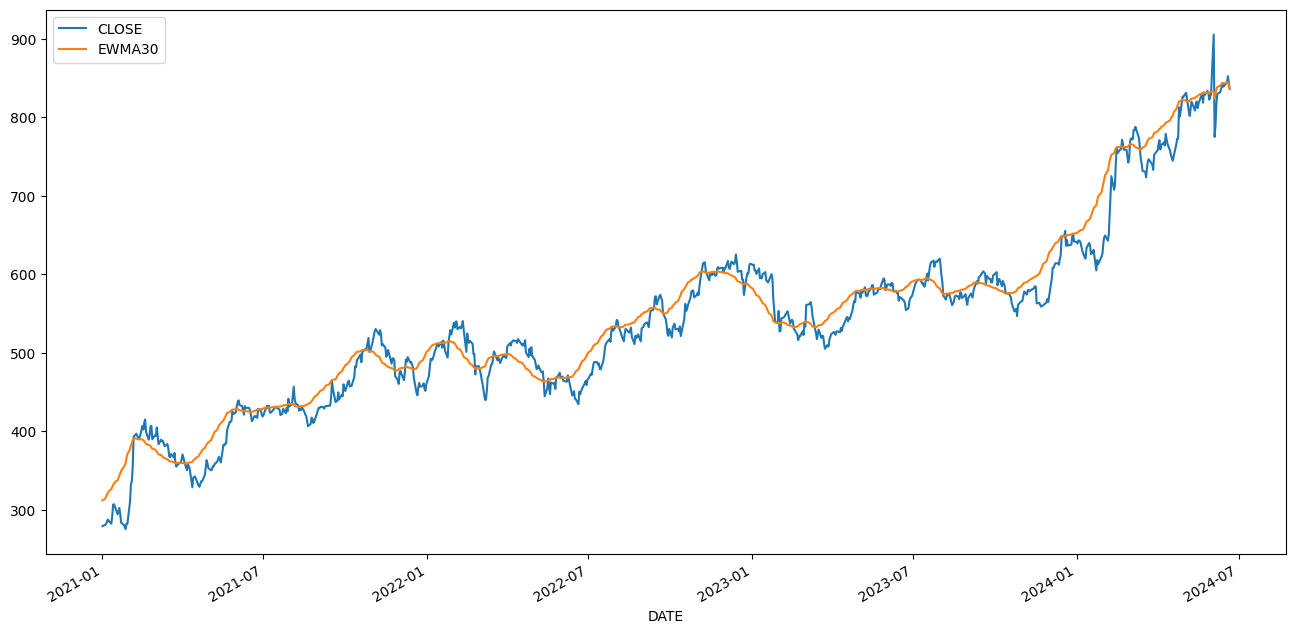

In [47]:
SBIN_EMA[['CLOSE','EWMA30']].plot(label='SBI Bank',
                                  figsize=(16,8))

# 2. Weekly Returns

### Axis

<Axes: xlabel='DATE'>

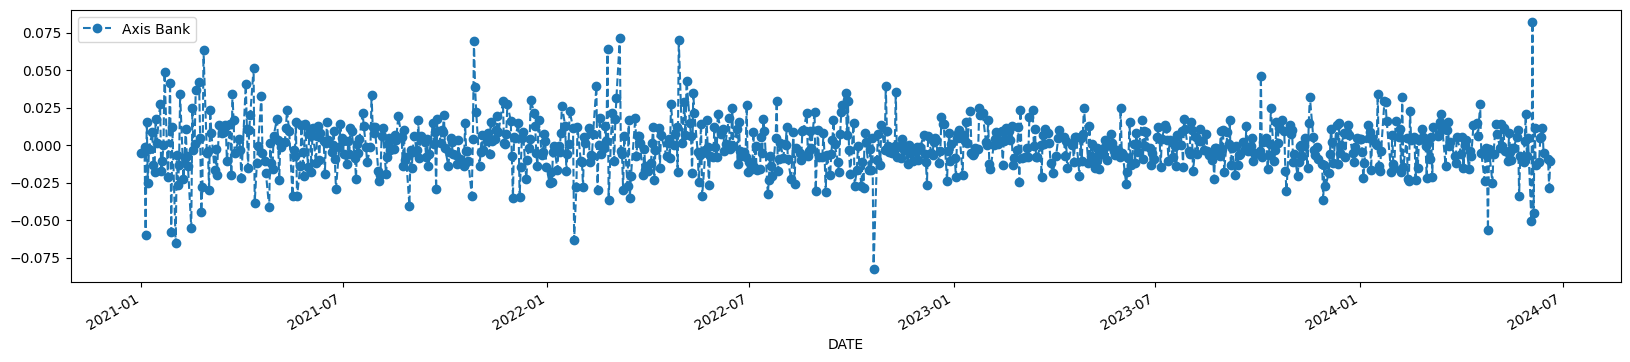

In [48]:
AXIS['Weekly Return']=AXIS['PREV. CLOSE'].pct_change()
AXIS['Weekly Return'].plot(figsize=(20,4), legend=True, linestyle='--', marker='o', label="Axis Bank")

<Axes: xlabel='DATE'>

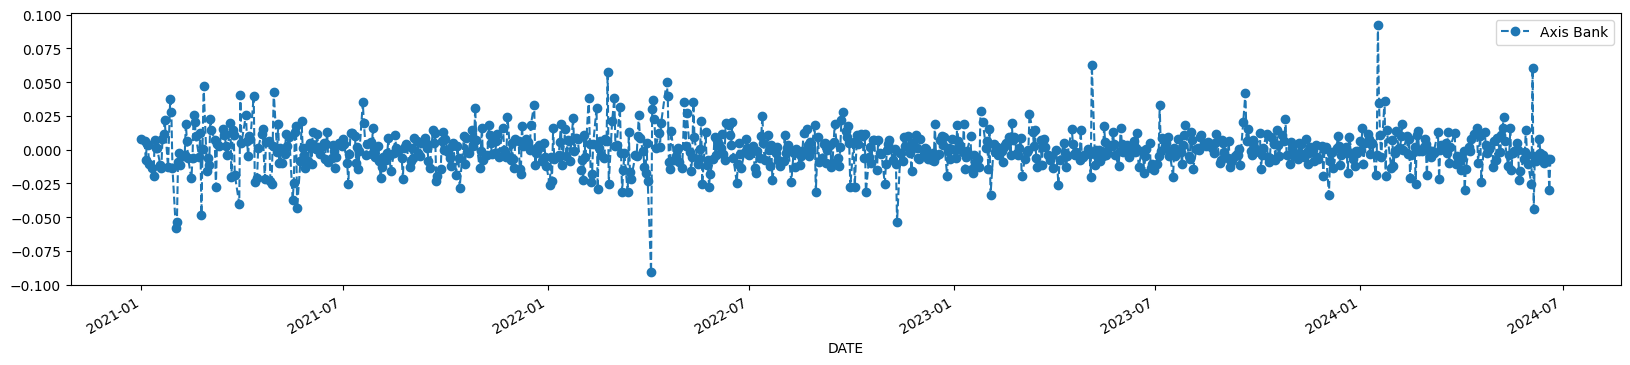

In [49]:
HDFC['Weekly Return']=HDFC['PREV. CLOSE'].pct_change()
HDFC['Weekly Return'].plot(figsize=(20,4), legend=True, linestyle='--', marker='o', label="Axis Bank")

<Axes: xlabel='DATE'>

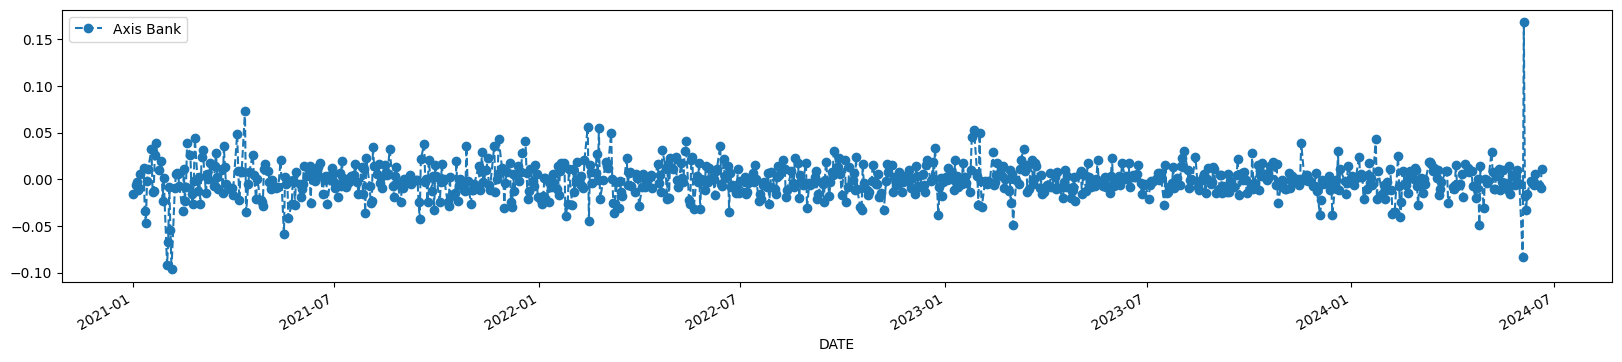

In [50]:
SBIN['Weekly Return']=SBIN['PREV. CLOSE'].pct_change()
SBIN['Weekly Return'].plot(figsize=(20,4), legend=True, linestyle='--', marker='o', label="Axis Bank")

# Overall look at the Average Weekly Returns

### Axis

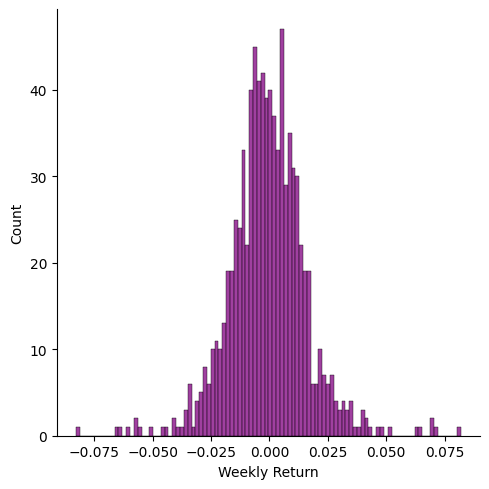

In [51]:
sns.displot(AXIS['Weekly Return'].dropna(), bins=100, color = 'purple')


### HDFC

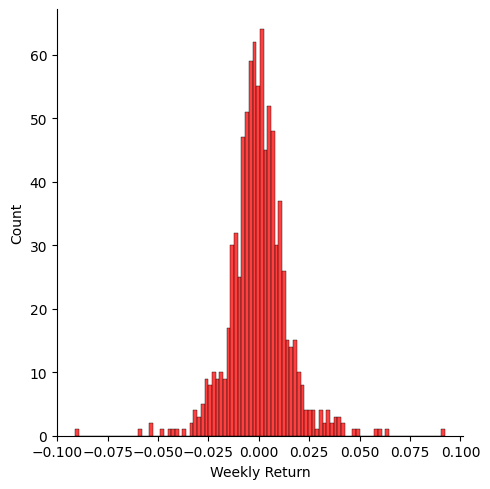

In [52]:
sns.displot(HDFC['Weekly Return'].dropna(), bins=100, color = 'red')


### SBIN

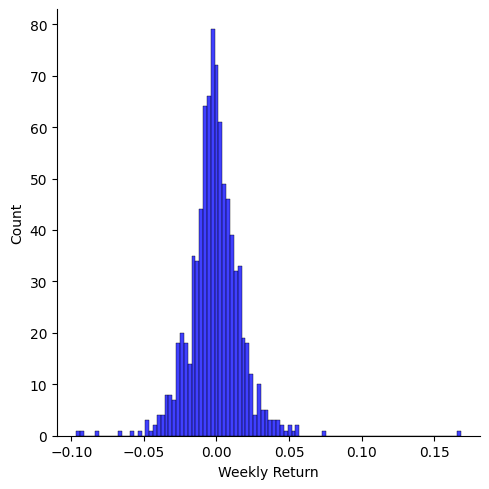

In [53]:
sns.displot(SBIN['Weekly Return'].dropna(), bins=100, color = 'blue')


# Returns of all the Stocks

In [54]:
AXIS_C = AXIS['CLOSE']
HDFC_C = HDFC['CLOSE']


SBI_C = SBIN['CLOSE']


In [55]:
common_index = AXIS_C.index.union(HDFC_C.index).union(SBI_C.index)

AXIS_C = AXIS_C.reindex(common_index)
HDFC_C = HDFC_C.reindex(common_index)
SBI_C = SBI_C.reindex(common_index)

closing_df = pd.concat([AXIS_C, HDFC_C, SBI_C], axis=1)


In [56]:
closing_df.columns.values[0] = "Axis_Bank"
closing_df.columns.values[1] = "HDFC_Bank"
closing_df.columns.values[2] = "SBI_Bank"

In [57]:
closing_df


,Axis_Bank,HDFC_Bank,SBI_Bank
DATE,,,
2024-06-21,1237.45,1665.75,836.30
2024-06-20,1239.50,1669.35,843.75
2024-06-19,1226.65,1657.85,852.60
2024-06-18,1191.90,1607.80,844.90
2024-06-14,1181.05,1596.90,839.20
...,...,...,...
2021-01-07,671.10,1416.25,287.70
2021-01-06,654.25,1420.55,285.05
2021-01-05,664.45,1426.70,281.75


***New DataFrame for storing stock weekly return***

In [58]:
bank_rets= closing_df.pct_change()

In [59]:
bank_rets.dropna()

,Axis_Bank,HDFC_Bank,SBI_Bank
DATE,,,
2024-06-20,0.001657,0.002161,0.008908
2024-06-19,-0.010367,-0.006889,0.010489
2024-06-18,-0.028329,-0.030190,-0.009031
2024-06-14,-0.009103,-0.006779,-0.006746
2024-06-13,-0.005419,-0.010113,0.005601
...,...,...,...
2021-01-07,-0.002378,-0.010757,0.005944
2021-01-06,-0.025108,0.003036,-0.009211
2021-01-05,0.015590,0.004329,-0.011577


# Using joinplot to compare the weekly returns of Axis Bank and HDFC Comparing Axis Bank and HDFC

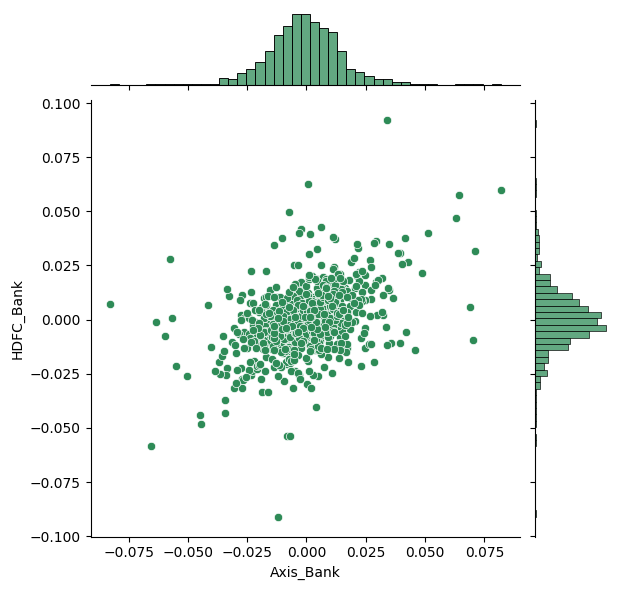

In [60]:
sns.jointplot(x="Axis_Bank",
                    y="HDFC_Bank",
                    data=bank_rets,kind='scatter', color='seagreen')

### Comparing Axis Bank and SBI Bank


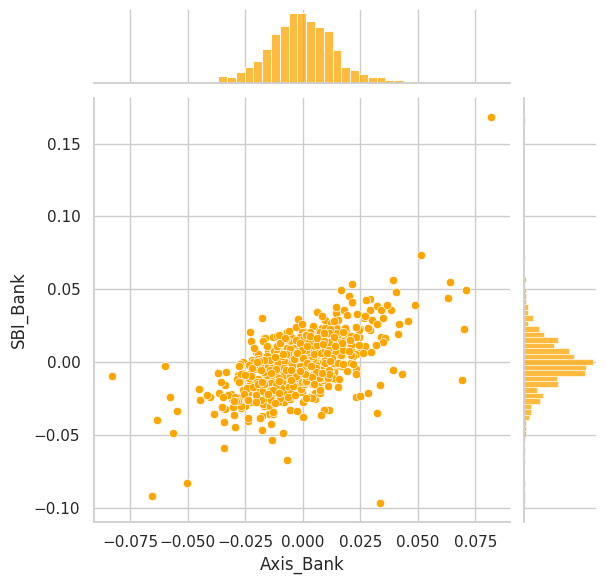

In [61]:
sns.set(style='whitegrid')
 
sns.jointplot(x="Axis_Bank",
                    y="SBI_Bank",
                    data=bank_rets,kind='scatter', color='orange')

# Automatic visual analysis of all the comparisons

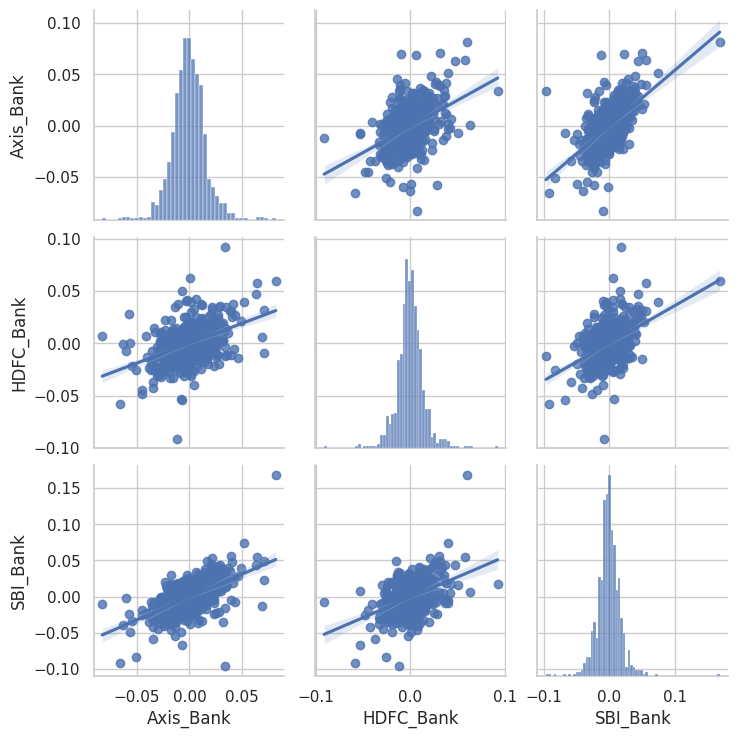

In [62]:
sns.pairplot(bank_rets.dropna(), kind ='reg')

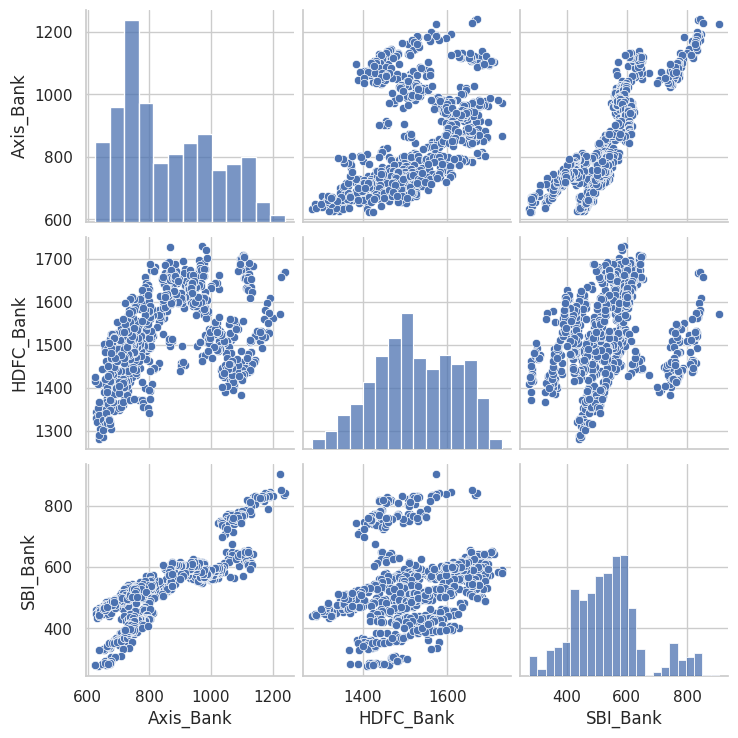

In [63]:
sns.pairplot(closing_df.dropna())

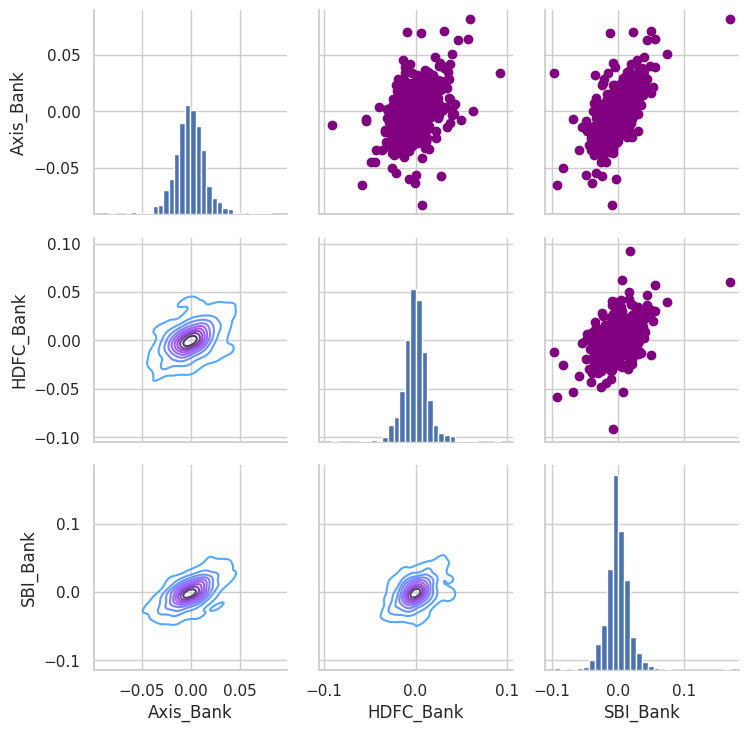

In [64]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(bank_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

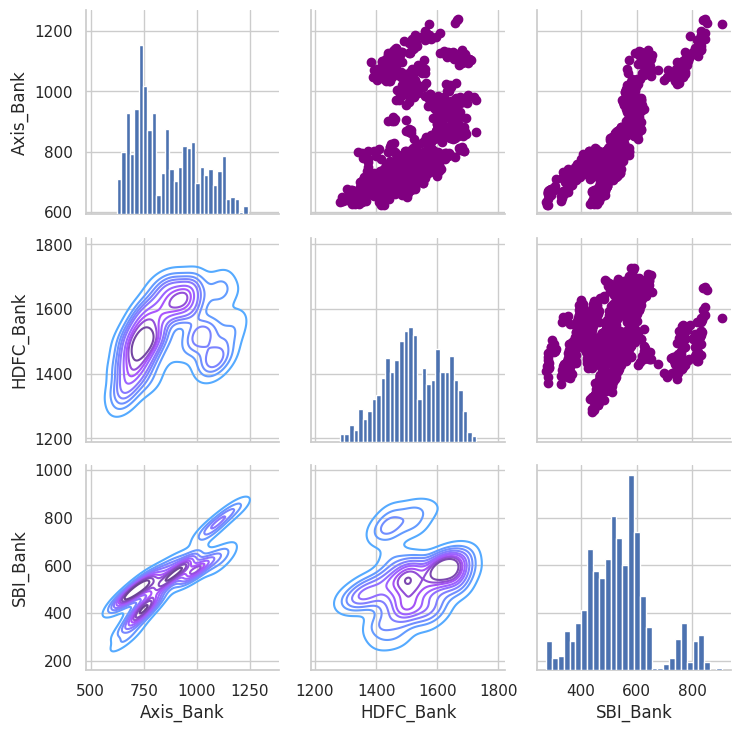

In [65]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

# HEATMAP

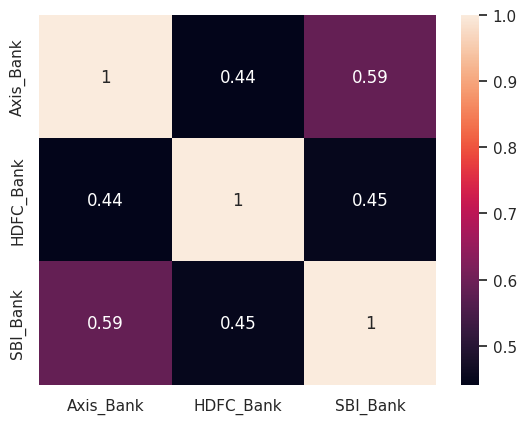

In [66]:
corr_plot_rets =sns.heatmap(bank_rets.corr(), annot= True)

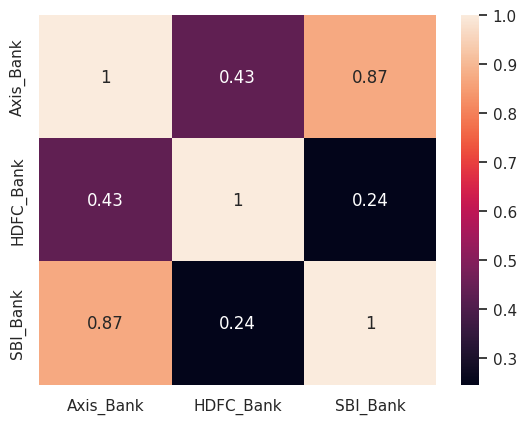

In [67]:
corr_plot_cl = sns.heatmap(closing_df.corr(), annot= True)

Text(0.5, 1.0, 'Correlation of stock closing price')

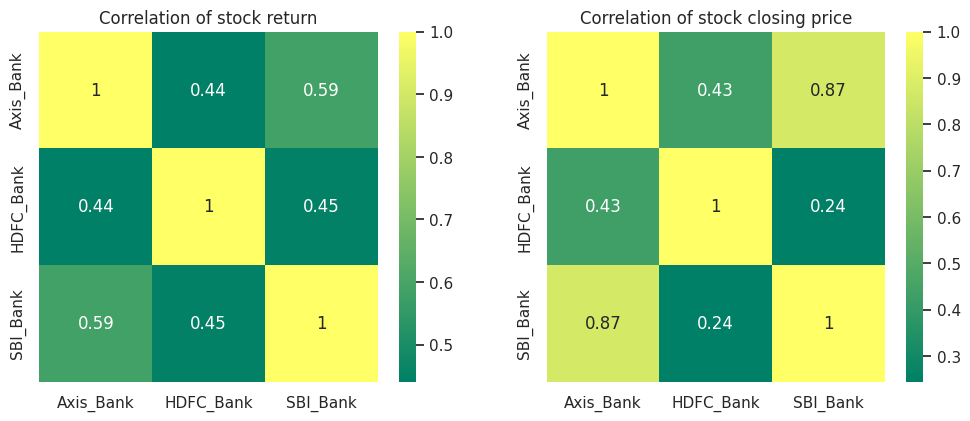

In [68]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(bank_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Heatmap excluding all the Null values


<Axes: ylabel='DATE'>

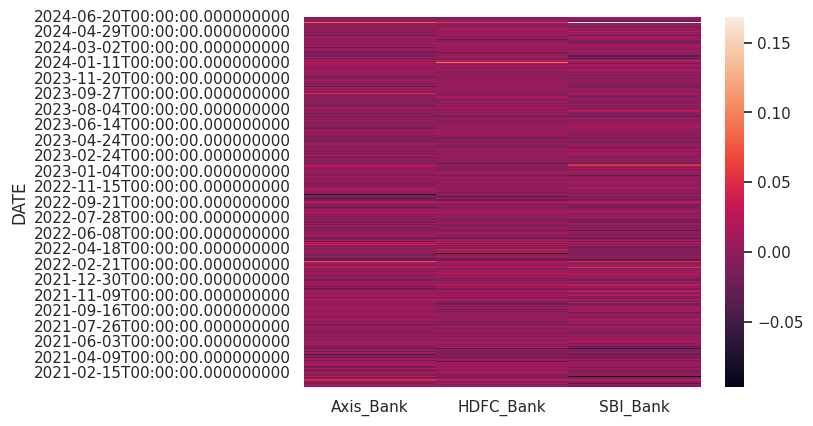

In [69]:
sns.heatmap(bank_rets.dropna())

# How much value do we put at risk by investing in a particular stock?

***''There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.''***

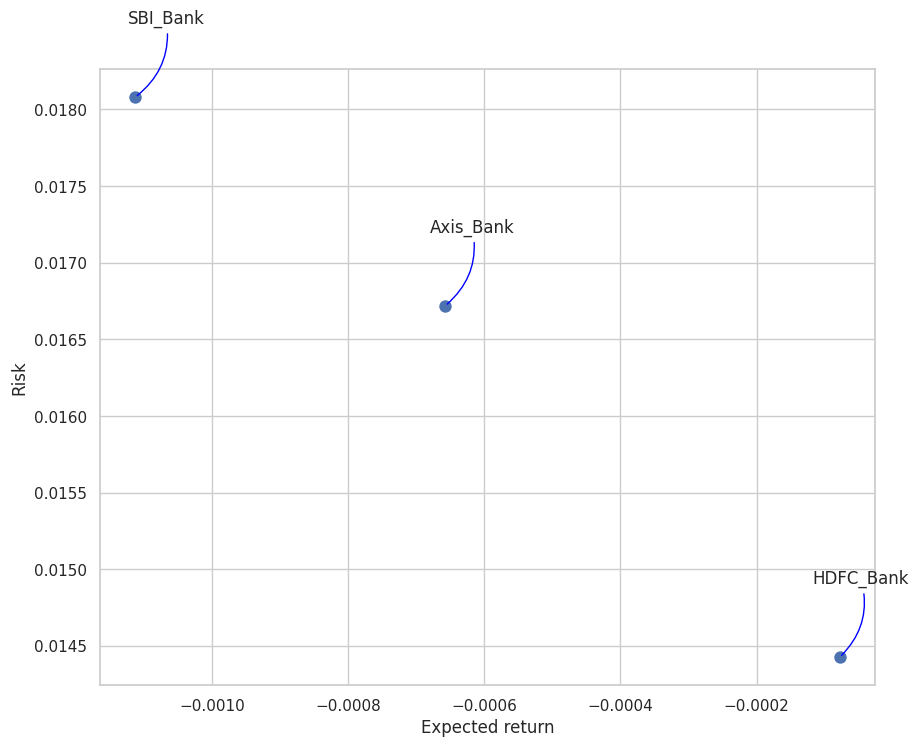

In [70]:
rets = bank_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



# Stock Prediction And Forecasting Using Stacked LSTM

In [71]:
closing_df

,Axis_Bank,HDFC_Bank,SBI_Bank
DATE,,,
2024-06-21,1237.45,1665.75,836.30
2024-06-20,1239.50,1669.35,843.75
2024-06-19,1226.65,1657.85,852.60
2024-06-18,1191.90,1607.80,844.90
2024-06-14,1181.05,1596.90,839.20
...,...,...,...
2021-01-07,671.10,1416.25,287.70
2021-01-06,654.25,1420.55,285.05
2021-01-05,664.45,1426.70,281.75
